In [469]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [470]:
ed=pd.read_excel("Election_Data.xlsx","Election_Dataset_Two Classes",index_col=0)
ed.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


# Descriptive analysis

In [471]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [472]:
ed.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [473]:
dups = ed.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(ed.shape)

Number of duplicate rows = 8
(1525, 9)


In [474]:
ed.drop_duplicates(inplace=True)
ed.shape

(1517, 9)

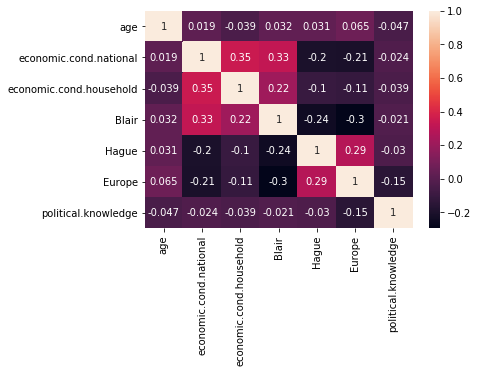

In [475]:
sns.heatmap(ed.corr(),annot=True)

In [476]:
ed.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

# EDA

In [477]:
xcols=list(ed.select_dtypes('object').columns)
xcols

['vote', 'gender']

In [478]:
cols=list(ed.select_dtypes(include=['int64','float64']).columns)
cols

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

# univariate analysis for Continous varaible

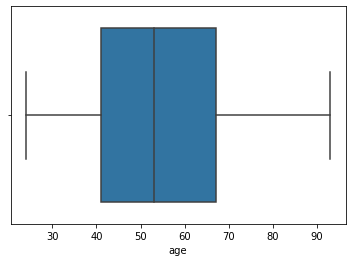

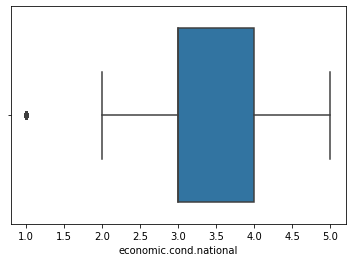

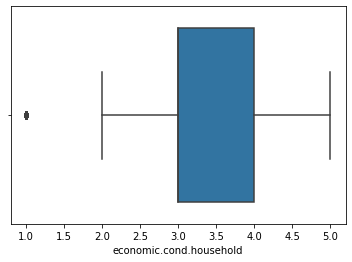

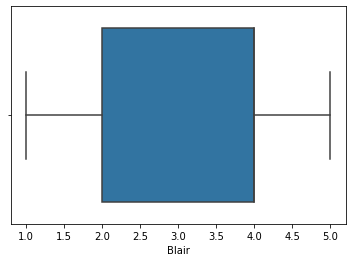

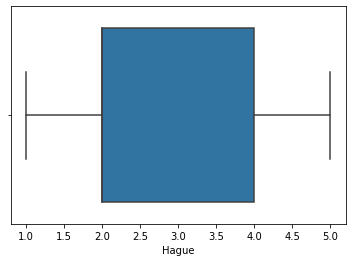

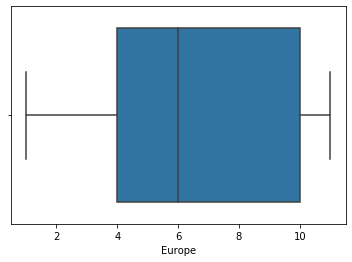

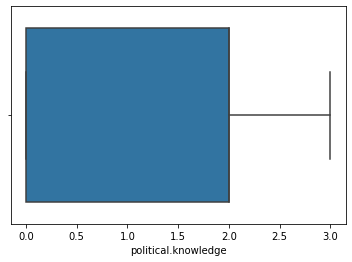

In [479]:
for i in cols:
    fig,axs=plt.subplots(ncols=1,nrows=1)
    sns.boxplot(ed[i])

# most of the columns are categorical even though of type int64

In [480]:
xcols.extend(['economic.cond.national','economic.cond.household','Blair','Hague','political.knowledge'])
xcols

['vote',
 'gender',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'political.knowledge']

In [481]:
cols=['age','Europe']
cols

['age', 'Europe']

# univariate analysis of variable of age and Europe, which are continous

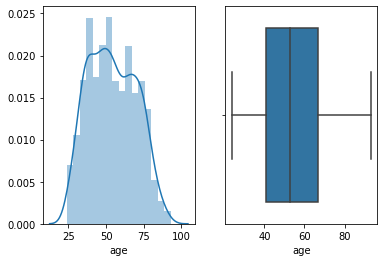

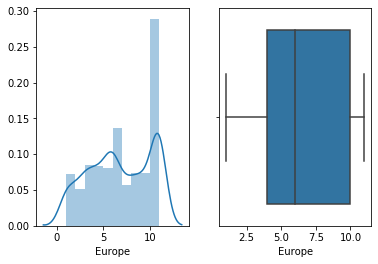

In [482]:
for i in cols:
    fig,axs=plt.subplots(nrows=1,ncols=2)
    sns.distplot(ed[i],ax=axs[0])
    sns.boxplot(ed[i],ax=axs[1])
    

# univariate analysis of categorical variables

Variable: vote
Labour          1057
Conservative     460
Name: vote, dtype: int64


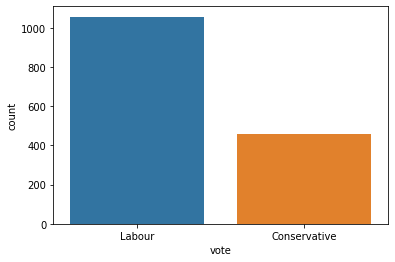

Variable: gender
female    808
male      709
Name: gender, dtype: int64


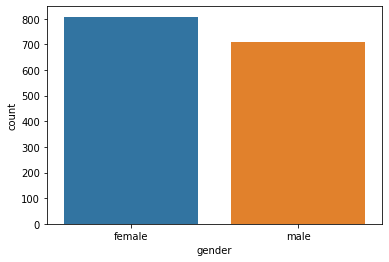

Variable: economic.cond.national
3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64


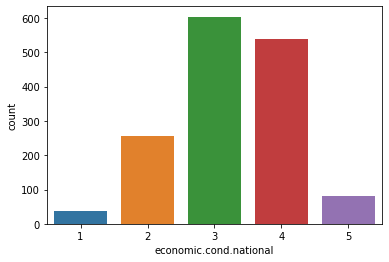

Variable: economic.cond.household
3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


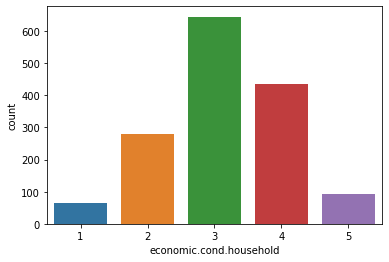

Variable: Blair
4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64


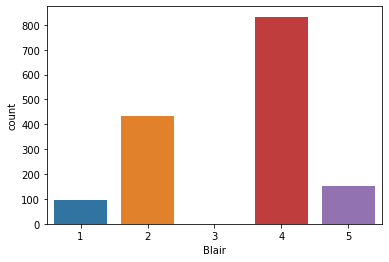

Variable: Hague
2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64


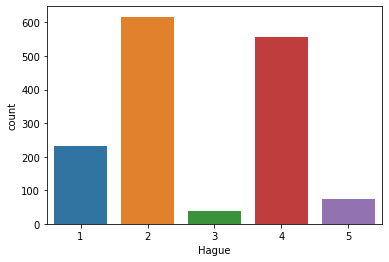

Variable: political.knowledge
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64


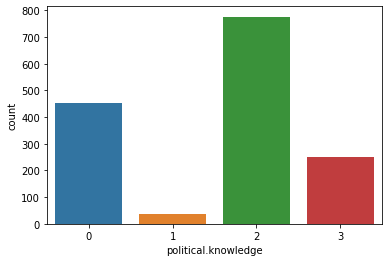

In [483]:
for i in xcols:
    print("Variable:",i)
    print(ed[i].value_counts())
    fig,axs=plt.subplots(nrows=1,ncols=1)
    sns.countplot(ed[i])
    plt.show()

# bivariate analysis of target variable and continous

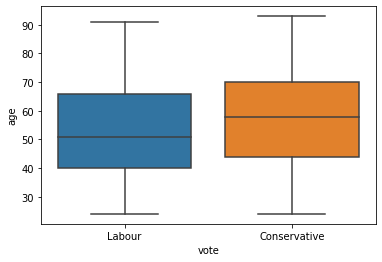

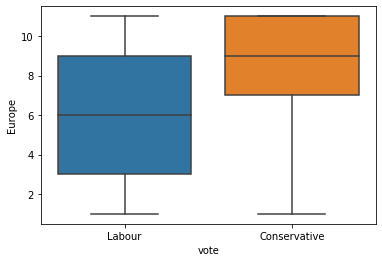

In [484]:
for i in cols:
    fig,axs=plt.subplots(nrows=1, ncols=1)
    sns.boxplot(ed['vote'],ed[i])

# bi-variate analysis of target variable and categorical varaibles

In [485]:
for i in xcols:
    print(pd.crosstab(ed['vote'],ed[i],normalize='index').round(2))
    print("      ")

vote          Conservative  Labour
vote                              
Conservative           1.0     0.0
Labour                 0.0     1.0
      
gender        female  male
vote                      
Conservative    0.56  0.44
Labour          0.52  0.48
      
economic.cond.national     1     2     3     4     5
vote                                                
Conservative            0.05  0.30  0.43  0.20  0.02
Labour                  0.02  0.11  0.38  0.42  0.07
      
economic.cond.household     1     2     3     4     5
vote                                                 
Conservative             0.06  0.27  0.43  0.19  0.05
Labour                   0.04  0.15  0.42  0.33  0.07
      
Blair            1     2    3     4     5
vote                                     
Conservative  0.13  0.52  0.0  0.34  0.01
Labour        0.04  0.18  0.0  0.64  0.14
      
Hague            1     2     3     4     5
vote                                      
Conservative  0.02  0.21  0.02  0.6

In [486]:
for i in xcols:
    print(pd.crosstab(ed['vote'],ed[i],normalize='columns').round(2))
    print("      ")

vote          Conservative  Labour
vote                              
Conservative           1.0     0.0
Labour                 0.0     1.0
      
gender        female  male
vote                      
Conservative    0.32  0.29
Labour          0.68  0.71
      
economic.cond.national     1     2     3     4     5
vote                                                
Conservative            0.57  0.55  0.33  0.17  0.11
Labour                  0.43  0.45  0.67  0.83  0.89
      
economic.cond.household     1     2     3    4     5
vote                                                
Conservative             0.43  0.45  0.31  0.2  0.25
Labour                   0.57  0.55  0.69  0.8  0.75
      
Blair            1     2    3     4     5
vote                                     
Conservative  0.61  0.55  1.0  0.19  0.02
Labour        0.39  0.45  0.0  0.81  0.98
      
Hague            1     2     3     4     5
vote                                      
Conservative  0.05  0.15  0.24  0.51  0

# Steps for modelling

# Since Conservative is in minority, it is converted to 1

In [416]:
target={'Conservative':1,'Labour':0}

In [417]:
ed['vote']=ed['vote'].map(target)

In [419]:
ed['vote'].value_counts(normalize=True)

0    0.69677
1    0.30323
Name: vote, dtype: float64

In [301]:
ed_dummy=pd.get_dummies(ed,drop_first=True)
ed_dummy

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1,0,43,3,3,4,1,2,2,0
2,0,36,4,4,4,4,5,2,1
3,0,35,4,4,5,2,3,2,1
4,0,24,4,2,2,1,4,0,0
5,0,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1521,1,67,5,3,2,4,11,3,1
1522,1,73,2,2,4,4,8,2,1
1523,0,37,3,3,5,4,2,2,1
1524,1,61,3,3,1,4,11,2,1


In [302]:
train,test=train_test_split(ed_dummy,test_size=0.3,random_state=1,stratify=ed_dummy['vote'])

In [303]:
X=train.drop('vote',axis=1)
Y=train['vote']

In [304]:
X_test=test.drop('vote',axis=1)
Y_test=test['vote']

# Scaling done since some models need it like KNN

In [305]:
ss=StandardScaler()

In [306]:
X.loc[:,:]=ss.fit_transform(X.loc[:,:])

In [307]:
X_test.loc[:,:]=ss.transform(X_test.loc[:,:])

# Logistic Regression

In [308]:
LR=LogisticRegression(random_state=1)

In [309]:
LR.fit(X,Y)

LogisticRegression(random_state=1)

In [310]:
train_pred_LR=LR.predict(X)
test_pred_LR=LR.predict(X_test)

In [311]:
train_prob_LR=LR.predict_proba(X)
test_prob_LR=LR.predict_proba(X_test)

# train

In [312]:
print(confusion_matrix(Y,train_pred_LR),'\n')
print(classification_report(Y,train_pred_LR))

[[679  60]
 [104 218]] 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       739
           1       0.78      0.68      0.73       322

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



auc 0.8945255045007942


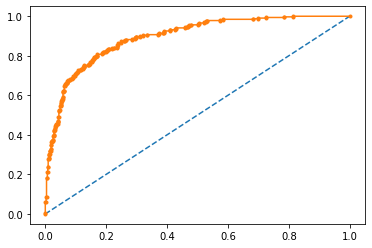

In [313]:
print('auc',roc_auc_score(Y,train_prob_LR[:,1]))
train_fpr_LR,train_tpr_LR,thresholds=roc_curve(Y,train_prob_LR[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_LR,train_tpr_LR,marker='.')
plt.show()

# test

In [314]:
print (confusion_matrix(Y_test,test_pred_LR))
print(classification_report(Y_test,test_pred_LR))

[[276  42]
 [ 45  93]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       318
           1       0.69      0.67      0.68       138

    accuracy                           0.81       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



auc 0.8734846413271352


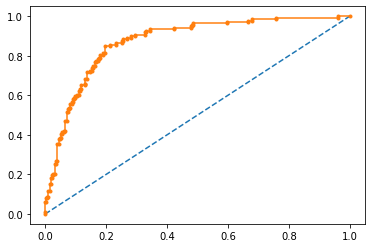

In [315]:
print ('auc',roc_auc_score(Y_test,test_prob_LR[:,1]))
test_fpr_LR,test_tpr_LR,thresholds=roc_curve(Y_test,test_prob_LR[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_LR,test_tpr_LR,marker='.')
plt.show()

# Linear Discriminant Analysis

In [316]:
LDA=LinearDiscriminantAnalysis()

In [317]:
LDA.fit(X,Y)

LinearDiscriminantAnalysis()

In [318]:
train_pred_LDA=LDA.predict(X)
test_pred_LDA= LDA.predict(X_test)

In [319]:
train_prob_LDA= LDA.predict_proba(X)
test_prob_LDA=LDA.predict_proba(X_test)

# train

In [320]:
print(confusion_matrix(Y,train_pred_LDA))
print(classification_report(Y,train_pred_LDA))

[[671  68]
 [100 222]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       739
           1       0.77      0.69      0.73       322

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



auc 0.8944204439438893


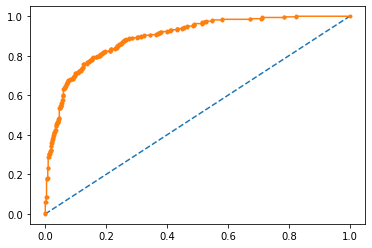

In [321]:
print('auc',roc_auc_score(Y,train_prob_LDA[:,1]))
train_fpr_LDA,train_tpr_LDA,thresholds=roc_curve(Y,train_prob_LDA[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_LDA,train_tpr_LDA,marker='.')
plt.show()

# test

In [322]:
print(confusion_matrix(Y_test,test_pred_LDA))
print(classification_report(Y_test,test_pred_LDA))

[[273  45]
 [ 43  95]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       318
           1       0.68      0.69      0.68       138

    accuracy                           0.81       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



auc 0.8726642967824264


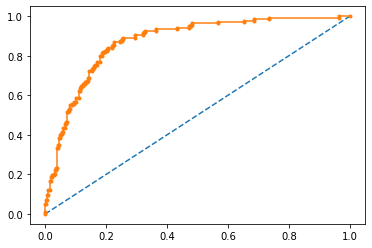

In [323]:
print('auc',roc_auc_score(Y_test,test_prob_LDA[:,1]))
test_fpr_LDA,test_tpr_LDA,thresholds=roc_curve(Y_test,test_prob_LDA[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_LDA,test_tpr_LDA,marker='.')
plt.show()

# KNN

In [324]:
KNN=KNeighborsClassifier()

In [325]:
KNN.fit(X,Y)

KNeighborsClassifier()

In [326]:
train_pred_KNN=KNN.predict(X)
test_pred_KNN=KNN.predict(X_test)

In [327]:
train_prob_KNN=KNN.predict_proba(X)
test_prob_KNN=KNN.predict_proba(X_test)

# train

In [328]:
print(confusion_matrix(Y,train_pred_KNN))
print(classification_report(Y,train_pred_KNN))

[[674  65]
 [ 87 235]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       739
           1       0.78      0.73      0.76       322

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.86      0.86      1061



auc 0.9286029467385


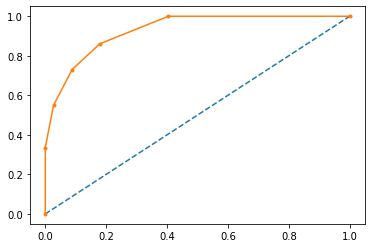

In [329]:
print('auc',roc_auc_score(Y,train_prob_KNN[:,1]))
train_fpr_KNN, train_tpr_KNN, thresholds=roc_curve(Y,train_prob_KNN[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_KNN,train_tpr_KNN,marker='.')
plt.show()

# test

In [330]:
print(confusion_matrix(Y_test,test_pred_KNN))
print(classification_report(Y_test,test_pred_KNN))

[[275  43]
 [ 43  95]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       318
           1       0.69      0.69      0.69       138

    accuracy                           0.81       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



auc 0.8462423662382644


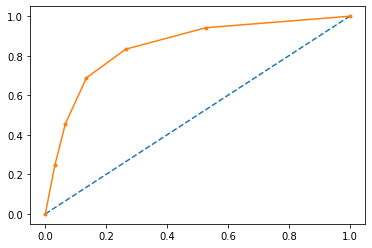

In [331]:
print('auc',roc_auc_score(Y_test,test_prob_KNN[:,1]))
test_fpr_KNN, test_tpr_KNN, thresholds=roc_curve(Y_test,test_prob_KNN[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_KNN,test_tpr_KNN,marker='.')
plt.show()

# Naiye Bayes

In [332]:
NB=GaussianNB()

In [333]:
NB.fit(X,Y)

GaussianNB()

In [334]:
train_pred_NB=NB.predict(X)
test_pred_NB=NB.predict(X_test)

In [335]:
train_prob_NB=NB.predict_proba(X)
test_prob_NB=NB.predict_proba(X_test)

# train

In [336]:
print(confusion_matrix(Y,train_pred_NB))
print(classification_report(Y,train_pred_NB))

[[658  81]
 [ 94 228]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       739
           1       0.74      0.71      0.72       322

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.84      0.83      1061



auc 0.8899070424192506


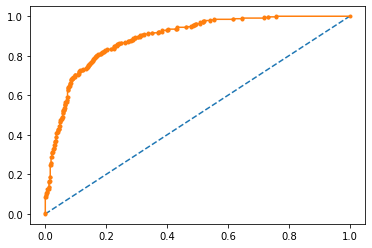

In [337]:
print('auc',roc_auc_score(Y,train_prob_NB[:,1]))
train_fpr_NB,train_tpr_NB,thresholds=roc_curve(Y,train_prob_NB[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_NB,train_tpr_NB,marker='.')
plt.show()

# test

In [338]:
print(confusion_matrix(Y_test,test_pred_NB))
print(classification_report(Y_test,test_pred_NB))

[[272  46]
 [ 36 102]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.69      0.74      0.71       138

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.79       456
weighted avg       0.82      0.82      0.82       456



auc 0.8772901285206454


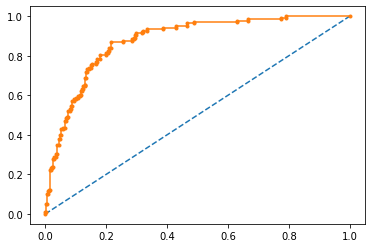

In [339]:
print('auc',roc_auc_score(Y_test,test_prob_NB[:,1]))
test_fpr_NB,test_tpr_NB,thresholds=roc_curve(Y_test,test_prob_NB[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_NB,test_tpr_NB,marker='.')
plt.show()

# Bagging Classifier

In [340]:
be=RandomForestClassifier(random_state=1)

In [423]:
BG=BaggingClassifier(base_estimator=be,random_state=1)

In [342]:
BG.fit(X,Y)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [442]:
BG.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': 1,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(random_state=1),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_star

In [343]:
train_pred_BG=BG.predict(X)
test_pred_BG=BG.predict(X_test)

In [344]:
train_prob_BG=BG.predict_proba(X)
test_prob_BG=BG.predict_proba(X_test)

# train

In [345]:
print(confusion_matrix(Y,train_pred_BG))
print(classification_report(Y,train_pred_BG))

[[733   6]
 [ 30 292]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       739
           1       0.98      0.91      0.94       322

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



auc 0.9964678640768538


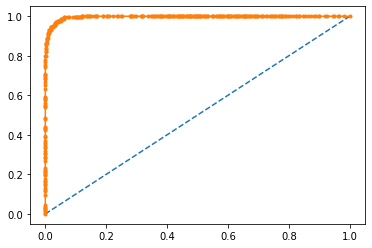

In [346]:
print('auc',roc_auc_score(Y,train_prob_BG[:,1]))
train_fpr_BG,train_tpr_BG,thresholds=roc_curve(Y,train_prob_BG[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_BG,train_tpr_BG,marker='.')
plt.show()

# test

In [347]:
print(confusion_matrix(Y_test,test_pred_BG))
print(classification_report(Y_test,test_pred_BG))

[[285  33]
 [ 43  95]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       318
           1       0.74      0.69      0.71       138

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



auc 0.8824970376446997


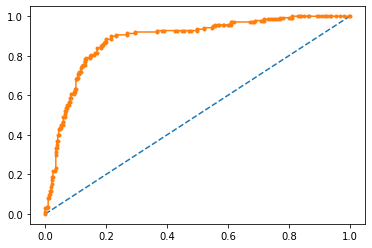

In [348]:
print('auc',roc_auc_score(Y_test,test_prob_BG[:,1]))
test_fpr_BG,test_tpr_BG,thresholds=roc_curve(Y_test,test_prob_BG[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_BG,test_tpr_BG,marker='.')
plt.show()

# AdaBoost

In [349]:
AB=AdaBoostClassifier(random_state=1)

In [350]:
AB.fit(X,Y)

AdaBoostClassifier(random_state=1)

In [351]:
train_pred_AB=AB.predict(X)
test_pred_AB=AB.predict(X_test)

In [352]:
train_prob_AB=AB.predict_proba(X)
test_prob_AB=AB.predict_proba(X_test)

# train

In [353]:
print(confusion_matrix(Y,train_pred_AB))
print(classification_report(Y,train_pred_AB))

[[676  63]
 [ 90 232]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       739
           1       0.79      0.72      0.75       322

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.86      0.85      1061



auc 0.9148084956168736


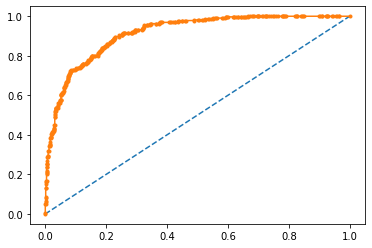

In [354]:
print('auc',roc_auc_score(Y,train_prob_AB[:,1]))
train_fpr_AB,train_tpr_AB,thresholds=roc_curve(Y,train_prob_AB[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_AB,train_tpr_AB,marker='.')
plt.show()

# test

In [355]:
print(confusion_matrix(Y_test,test_pred_AB))
print(classification_report(Y_test,test_pred_AB))

[[279  39]
 [ 44  94]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       318
           1       0.71      0.68      0.69       138

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



auc 0.8708868836022239


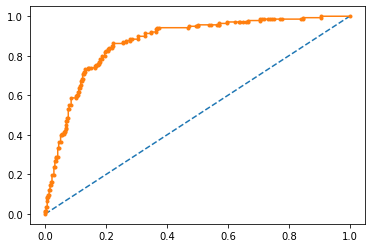

In [356]:
print('auc',roc_auc_score(Y_test,test_prob_AB[:,1]))
test_fpr_AB,test_tpr_AB,thresholds=roc_curve(Y_test,test_prob_AB[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_AB,test_tpr_AB,marker='.')
plt.show()

# Gradient Boosting

In [357]:
GB=GradientBoostingClassifier(random_state=1)

In [358]:
GB.fit(X,Y)

GradientBoostingClassifier(random_state=1)

In [359]:
train_pred_GB=GB.predict(X)
test_pred_GB=GB.predict(X_test)

In [360]:
train_prob_GB=GB.predict_proba(X)
test_prob_GB=GB.predict_proba(X_test)

# train

In [361]:
print(confusion_matrix(Y,train_pred_GB))
print(classification_report(Y,train_pred_GB))

[[700  39]
 [ 72 250]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       739
           1       0.87      0.78      0.82       322

    accuracy                           0.90      1061
   macro avg       0.89      0.86      0.87      1061
weighted avg       0.89      0.90      0.89      1061



auc 0.9528257087385168


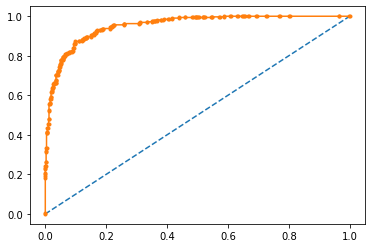

In [362]:
print('auc',roc_auc_score(Y,train_prob_GB[:,1]))
train_fpr_GB,train_tpr_GB,thresholds=roc_curve(Y,train_prob_GB[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_GB,train_tpr_GB,marker='.')
plt.show()

# test

In [363]:
print(confusion_matrix(Y_test,test_pred_GB))
print(classification_report(Y_test,test_pred_GB))

[[279  39]
 [ 46  92]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       318
           1       0.70      0.67      0.68       138

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



auc 0.890803026159876


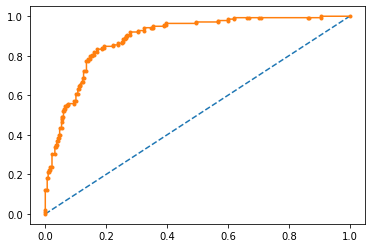

In [364]:
print('auc',roc_auc_score(Y_test,test_prob_GB[:,1]))
test_fpr_GB,test_tpr_GB,thresholds=roc_curve(Y_test,test_prob_GB[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_GB,test_tpr_GB,marker='.')
plt.show()

# comparison report for all models

In [365]:
train_acc_LR=LR.score(X,Y)
test_acc_LR=LR.score(X_test,Y_test)
train_auc_LR = roc_auc_score(Y, train_prob_LR[:,1])
test_auc_LR = roc_auc_score(Y_test, test_prob_LR[:,1])

In [366]:
train_metrics_LR=classification_report(Y, train_pred_LR,output_dict=True)
df=pd.DataFrame(train_metrics_LR).transpose()
train_f1_LR=round(df.loc["1"][2],2)
train_recall_LR=round(df.loc["1"][1],2)
train_precision_LR=round(df.loc["1"][0],2)

In [367]:
test_metrics_LR=classification_report(Y_test, test_pred_LR,output_dict=True)
df=pd.DataFrame(test_metrics_LR).transpose()
test_f1_LR=round(df.loc["1"][2],2)
test_recall_LR=round(df.loc["1"][1],2)
test_precision_LR=round(df.loc["1"][0],2)

In [368]:
train_acc_LDA=LDA.score(X,Y)
test_acc_LDA=LDA.score(X_test,Y_test)
train_auc_LDA = roc_auc_score(Y, train_prob_LDA[:,1])
test_auc_LDA = roc_auc_score(Y_test, test_prob_LDA[:,1])

In [369]:
train_metrics_LDA=classification_report(Y, train_pred_LDA,output_dict=True)
df=pd.DataFrame(train_metrics_LDA).transpose()
train_f1_LDA=round(df.loc["1"][2],2)
train_recall_LDA=round(df.loc["1"][1],2)
train_precision_LDA=round(df.loc["1"][0],2)

In [370]:
test_metrics_LDA=classification_report(Y_test, test_pred_LDA,output_dict=True)
df=pd.DataFrame(test_metrics_LDA).transpose()
test_f1_LDA=round(df.loc["1"][2],2)
test_recall_LDA=round(df.loc["1"][1],2)
test_precision_LDA=round(df.loc["1"][0],2)

In [371]:
train_acc_KNN=KNN.score(X,Y)
test_acc_KNN=KNN.score(X_test,Y_test)
train_auc_KNN = roc_auc_score(Y, train_prob_KNN[:,1])
test_auc_KNN = roc_auc_score(Y_test, test_prob_KNN[:,1])

In [372]:
train_metrics_KNN=classification_report(Y, train_pred_KNN,output_dict=True)
df=pd.DataFrame(train_metrics_KNN).transpose()
train_f1_KNN=round(df.loc["1"][2],2)
train_recall_KNN=round(df.loc["1"][1],2)
train_precision_KNN=round(df.loc["1"][0],2)

In [373]:
test_metrics_KNN=classification_report(Y_test, test_pred_KNN,output_dict=True)
df=pd.DataFrame(test_metrics_KNN).transpose()
test_f1_KNN=round(df.loc["1"][2],2)
test_recall_KNN=round(df.loc["1"][1],2)
test_precision_KNN=round(df.loc["1"][0],2)

In [374]:
train_acc_NB=NB.score(X,Y)
test_acc_NB=NB.score(X_test,Y_test)
train_auc_NB = roc_auc_score(Y, train_prob_NB[:,1])
test_auc_NB = roc_auc_score(Y_test, test_prob_NB[:,1])

In [375]:
train_metrics_NB=classification_report(Y, train_pred_NB,output_dict=True)
df=pd.DataFrame(train_metrics_NB).transpose()
train_f1_NB=round(df.loc["1"][2],2)
train_recall_NB=round(df.loc["1"][1],2)
train_precision_NB=round(df.loc["1"][0],2)

In [376]:
test_metrics_NB=classification_report(Y_test, test_pred_NB,output_dict=True)
df=pd.DataFrame(test_metrics_NB).transpose()
test_f1_NB=round(df.loc["1"][2],2)
test_recall_NB=round(df.loc["1"][1],2)
test_precision_NB=round(df.loc["1"][0],2)

In [377]:
train_acc_GB=GB.score(X,Y)
test_acc_GB=GB.score(X_test,Y_test)
train_auc_GB = roc_auc_score(Y, train_prob_GB[:,1])
test_auc_GB = roc_auc_score(Y_test, test_prob_GB[:,1])

In [378]:
train_metrics_GB=classification_report(Y, train_pred_GB,output_dict=True)
df=pd.DataFrame(train_metrics_GB).transpose()
train_f1_GB=round(df.loc["1"][2],2)
train_recall_GB=round(df.loc["1"][1],2)
train_precision_GB=round(df.loc["1"][0],2)

In [379]:
test_metrics_GB=classification_report(Y_test, test_pred_GB,output_dict=True)
df=pd.DataFrame(test_metrics_GB).transpose()
test_f1_GB=round(df.loc["1"][2],2)
test_recall_GB=round(df.loc["1"][1],2)
test_precision_GB=round(df.loc["1"][0],2)

In [380]:
train_acc_AB=AB.score(X,Y)
test_acc_AB=AB.score(X_test,Y_test)
train_auc_AB = roc_auc_score(Y, train_prob_AB[:,1])
test_auc_AB = roc_auc_score(Y_test, test_prob_AB[:,1])

In [381]:
train_metrics_AB=classification_report(Y, train_pred_AB,output_dict=True)
df=pd.DataFrame(train_metrics_AB).transpose()
train_f1_AB=round(df.loc["1"][2],2)
train_recall_AB=round(df.loc["1"][1],2)
train_precision_AB=round(df.loc["1"][0],2)

In [382]:
test_metrics_AB=classification_report(Y_test, test_pred_AB,output_dict=True)
df=pd.DataFrame(test_metrics_AB).transpose()
test_f1_AB=round(df.loc["1"][2],2)
test_recall_AB=round(df.loc["1"][1],2)
test_precision_AB=round(df.loc["1"][0],2)

In [383]:
train_acc_BG=BG.score(X,Y)
test_acc_BG=BG.score(X_test,Y_test)
train_auc_BG = roc_auc_score(Y, train_prob_BG[:,1])
test_auc_BG = roc_auc_score(Y_test, test_prob_BG[:,1])

In [384]:
train_metrics_BG=classification_report(Y, train_pred_BG,output_dict=True)
df=pd.DataFrame(train_metrics_BG).transpose()
train_f1_BG=round(df.loc["1"][2],2)
train_recall_BG=round(df.loc["1"][1],2)
train_precision_BG=round(df.loc["1"][0],2)

In [385]:
test_metrics_BG=classification_report(Y_test, test_pred_BG,output_dict=True)
df=pd.DataFrame(test_metrics_BG).transpose()
test_f1_BG=round(df.loc["1"][2],2)
test_recall_BG=round(df.loc["1"][1],2)
test_precision_BG=round(df.loc["1"][0],2)

In [386]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logit Train':[train_acc_LR,train_auc_LR,train_recall_LR,train_precision_LR,train_f1_LR],
        'Logit Test':[test_acc_LR,test_auc_LR,test_recall_LR,test_precision_LR,test_f1_LR],
       'LDA Train':[train_acc_LDA,train_auc_LDA,train_recall_LDA,train_precision_LDA,train_f1_LDA],
        'LDA Test':[test_acc_LDA,test_auc_LDA,test_recall_LDA,test_precision_LDA,test_f1_LDA],
       'KNN Train':[train_acc_KNN,train_auc_KNN,train_recall_KNN,train_precision_KNN,train_f1_KNN],
        'KNN Test':[test_acc_KNN,test_auc_KNN,test_recall_KNN,test_precision_KNN,test_f1_KNN],
        'Naive Train':[train_acc_NB,train_auc_NB,train_recall_NB,train_precision_NB,train_f1_NB],
        'Naive Test':[test_acc_NB,test_auc_NB,test_recall_NB,test_precision_NB,test_f1_NB],
        'Bagging Train':[train_acc_BG,train_auc_BG,train_recall_BG,train_precision_BG,train_f1_BG],
        'Bagging Test':[test_acc_BG,test_auc_BG,test_recall_BG,test_precision_BG,test_f1_BG],
        'Ada Train':[train_acc_AB,train_auc_AB,train_recall_AB,train_precision_AB,train_f1_AB],
        'Ada Test':[test_acc_AB,test_auc_AB,test_recall_AB,test_precision_AB,test_f1_AB],
        'Grad Train':[train_acc_GB,train_auc_GB,train_recall_GB,train_precision_GB,train_f1_GB],
        'Grad Test':[test_acc_GB,test_auc_GB,test_recall_GB,test_precision_GB,test_f1_GB]},index=index)
round(data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,Naive Train,Naive Test,Bagging Train,Bagging Test,Ada Train,Ada Test,Grad Train,Grad Test
Accuracy,0.85,0.81,0.84,0.81,0.86,0.81,0.84,0.82,0.97,0.83,0.86,0.82,0.90,0.81
AUC,0.89,0.87,0.89,0.87,0.93,0.85,0.89,0.88,1.00,0.88,0.91,0.87,0.95,0.89
Recall,0.68,0.67,0.69,0.69,0.73,0.69,0.71,0.74,0.91,0.69,0.72,0.68,0.78,0.67
Precision,0.78,0.69,0.77,0.68,0.78,0.69,0.74,0.69,0.98,0.74,0.79,0.71,0.87,0.70
F1 Score,0.73,0.68,0.73,0.68,0.76,0.69,0.72,0.71,0.94,0.71,0.75,0.69,0.82,0.68


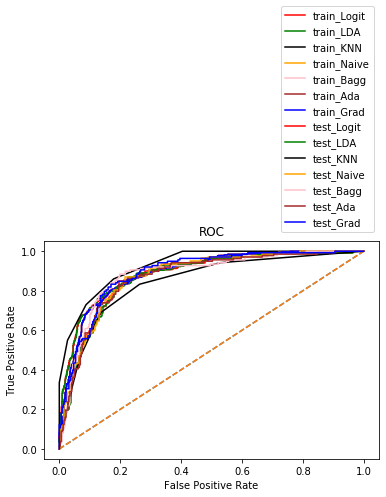

In [387]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_LR, train_tpr_LR,color='red',label="train_Logit")
plt.plot(train_fpr_LDA,train_tpr_LDA,color='green',label="train_LDA")
plt.plot(train_fpr_KNN,train_tpr_KNN,color='black',label="train_KNN")
plt.plot(train_fpr_NB,train_tpr_NB,color='orange',label="train_Naive")
plt.plot(train_fpr_NB,train_tpr_NB,color='pink',label="train_Bagg")
plt.plot(train_fpr_NB,train_tpr_NB,color='brown',label="train_Ada")
plt.plot(train_fpr_NB,train_tpr_NB,color='blue',label="train_Grad")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_LR, test_tpr_LR,color='red',label="test_Logit")
plt.plot(test_fpr_LDA,test_tpr_LDA,color='green',label="test_LDA")
plt.plot(test_fpr_KNN,test_tpr_KNN,color='black',label="test_KNN")
plt.plot(test_fpr_NB,test_tpr_NB,color='orange',label="test_Naive")
plt.plot(test_fpr_BG,test_tpr_BG,color='pink',label="test_Bagg")
plt.plot(test_fpr_AB,test_tpr_AB,color='brown',label="test_Ada")
plt.plot(test_fpr_GB,test_tpr_GB,color='blue',label="test_Grad")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# Bagging Classifier seems to be best one among all based on performance metrics

# Hyperparameter tuning for Bagging Classifier

In [454]:
params={'n_estimators':[10,40,50],
        'base_estimator__n_estimators':[100,70,50],
       'base_estimator__min_samples_split':[2,5],
        'base_estimator__max_depth':[1,2]}

In [455]:
BG_tuned=GridSearchCV(BaggingClassifier(base_estimator=RandomForestClassifier()), param_grid=params, cv=3)

In [456]:
BG_tuned.fit(X,Y)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2],
                         'base_estimator__min_samples_split': [2, 5],
                         'base_estimator__n_estimators': [100, 70, 50],
                         'n_estimators': [10, 40, 50]})

In [457]:
BG_tuned.best_params_

{'base_estimator__max_depth': 2,
 'base_estimator__min_samples_split': 2,
 'base_estimator__n_estimators': 70,
 'n_estimators': 40}

In [459]:
train_pred_BG_tuned=BG_tuned.predict(X)
test_pred_BG_tuned=BG_tuned.predict(X_test)

In [460]:
train_prob_BG_tuned=BG_tuned.predict_proba(X)
test_prob_BG_tuned=BG_tuned.predict_proba(X_test)

# train

In [461]:
print(confusion_matrix(Y,train_pred_BG_tuned))
print(classification_report(Y,train_pred_BG_tuned))

[[716  23]
 [188 134]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       739
           1       0.85      0.42      0.56       322

    accuracy                           0.80      1061
   macro avg       0.82      0.69      0.72      1061
weighted avg       0.81      0.80      0.78      1061



auc 0.8939329629598501


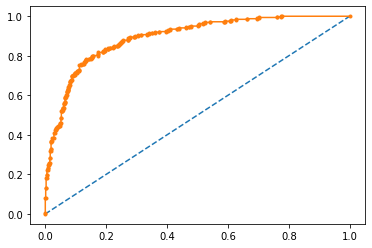

In [462]:
print('auc',roc_auc_score(Y,train_prob_BG_tuned[:,1]))
train_fpr_BG_tuned,train_tpr_BG_tuned,thresholds=roc_curve(Y,train_prob_BG_tuned[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr_BG_tuned,train_tpr_BG_tuned,marker='.')
plt.show()

# test

In [463]:
print(confusion_matrix(Y_test,test_pred_BG_tuned))
print(classification_report(Y_test,test_pred_BG_tuned))

[[297  21]
 [ 84  54]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       318
           1       0.72      0.39      0.51       138

    accuracy                           0.77       456
   macro avg       0.75      0.66      0.68       456
weighted avg       0.76      0.77      0.75       456



auc 0.8753987785981223


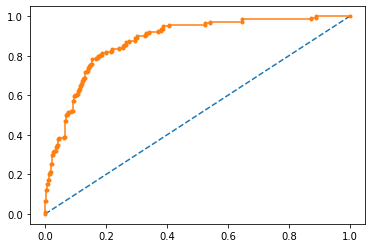

In [464]:
print('auc',roc_auc_score(Y_test,test_prob_BG_tuned[:,1]))
test_fpr_BG_tuned,test_tpr_BG_tuned,thresholds=roc_curve(Y_test,test_prob_BG_tuned[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr_BG_tuned,test_tpr_BG_tuned,marker='.')
plt.show()

# the hyparameter tuning didnt improve the accuracy, and the default parameter is the best one